In [1]:
pip install ucimlrepo --user


Looking in indexes: https://artifactory.apps.bancolombia.com/api/pypi/pypi-bancolombia/simpleNote: you may need to restart the kernel to use updated packages.



Estamos descargando una Base de datos  de informacion creditica de un banco aleman de 1994. Este conjunto de datos clasifica a las personas descritas por un conjunto de atributos como de buen o mal riesgo crediticio.

In [ ]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144) 
  
# data (as pandas dataframes) 
X = statlog_german_credit_data.data.features 
y = statlog_german_credit_data.data.targets 
  
# metadata 
print(statlog_german_credit_data.metadata) 
  
# variable information 
print(statlog_german_credit_data.variables) 

Revision de nuestras variables 

In [35]:
#Revisar nuestros datos 
X.head(2)

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201


In [36]:
#Rebombrar nuestras columnas con base a la documentacion 


X.rename(columns={
    'Attribute1': 'Estado_Cuenta_Corriente','Attribute2': 'Duracion_Meses','Attribute3': 'Historial_Credito','Attribute4': 'Proposito','Attribute5': 'Monto_Credito',
     'Attribute6': 'Estado_Cuenta_Ahorros','Attribute7': 'Antiguedad_Empleo','Attribute8': 'Porcentaje_Cuota','Attribute9': 'Estado_Personal_Sexo','Attribute10': 'Otros_Deudores_Avalistas',
 'Attribute11': 'Antiguedad_Residencia','Attribute12': 'Tipo_Propiedad','Attribute13': 'Edad_Anos','Attribute14': 'Otros_Planes_Financiamiento','Attribute15': 'Tipo_Vivienda',
 'Attribute16': 'Cantidad_Creditos_Existentes','Attribute17': 'Tipo_Trabajo','Attribute18': 'Cantidad_Dependientes','Attribute19': 'Telefono',
 'Attribute20': 'Es_Trabajador_Extranjero'
}, inplace=True)


C:\Users\jopulgar\AppData\Local\Temp\ipykernel_27884\3039125898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.rename(columns={


Es iportante hacer un pequeño anlisis de nuestra base de datos y revisar que tipos de datos tenemos como si tambien tenemos datos faltantes

In [37]:
X.isna().any().any()

False

In [38]:
#Atributo que nos devuelve la existencia de datos faltantes
X.isna().value_counts()

Estado_Cuenta_Corriente  Duracion_Meses  Historial_Credito  Proposito  Monto_Credito  Estado_Cuenta_Ahorros  Antiguedad_Empleo  Porcentaje_Cuota  Estado_Personal_Sexo  Otros_Deudores_Avalistas  Antiguedad_Residencia  Tipo_Propiedad  Edad_Anos  Otros_Planes_Financiamiento  Tipo_Vivienda  Cantidad_Creditos_Existentes  Tipo_Trabajo  Cantidad_Dependientes  Telefono  Es_Trabajador_Extranjero
False                    False           False              False      False          False                  False              False             False                 False                     False                  False           False      False                        False          False                         False         False                  False     False                       1000
Name: count, dtype: int64

In [39]:
X.head(2)

,Estado_Cuenta_Corriente,Duracion_Meses,Historial_Credito,Proposito,Monto_Credito,Estado_Cuenta_Ahorros,Antiguedad_Empleo,Porcentaje_Cuota,Estado_Personal_Sexo,Otros_Deudores_Avalistas,Antiguedad_Residencia,Tipo_Propiedad,Edad_Anos,Otros_Planes_Financiamiento,Tipo_Vivienda,Cantidad_Creditos_Existentes,Tipo_Trabajo,Cantidad_Dependientes,Telefono,Es_Trabajador_Extranjero
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201


In [40]:
#Revisar los tipos de datos de nuestras variables
X.dtypes
#int64 = variable numerica 
#Objeto normalmente un texto pero puede ser el caso de tener texto y numeros

Estado_Cuenta_Corriente         object
Duracion_Meses                   int64
Historial_Credito               object
Proposito                       object
Monto_Credito                    int64
Estado_Cuenta_Ahorros           object
Antiguedad_Empleo               object
Porcentaje_Cuota                 int64
Estado_Personal_Sexo            object
Otros_Deudores_Avalistas        object
Antiguedad_Residencia            int64
Tipo_Propiedad                  object
Edad_Anos                        int64
Otros_Planes_Financiamiento     object
Tipo_Vivienda                   object
Cantidad_Creditos_Existentes     int64
Tipo_Trabajo                    object
Cantidad_Dependientes            int64
Telefono                        object
Es_Trabajador_Extranjero        object
dtype: object

In [41]:
X.head(3)

,Estado_Cuenta_Corriente,Duracion_Meses,Historial_Credito,Proposito,Monto_Credito,Estado_Cuenta_Ahorros,Antiguedad_Empleo,Porcentaje_Cuota,Estado_Personal_Sexo,Otros_Deudores_Avalistas,Antiguedad_Residencia,Tipo_Propiedad,Edad_Anos,Otros_Planes_Financiamiento,Tipo_Vivienda,Cantidad_Creditos_Existentes,Tipo_Trabajo,Cantidad_Dependientes,Telefono,Es_Trabajador_Extranjero
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201


Ahora debemos convertir nuestras variables categoricas en numero interpretables para nuestros modelos utilizaremos  el preprocesador OrdinalEncoder de sklearn para poder tranformar nuestros datos

In [42]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Filtrar las columnas de tipo 'object'
columnas_object = X.select_dtypes(include=['object']).columns

# Instanciar el encoder
encoder = OrdinalEncoder()

# Aplicar el encoder a las columnas de tipo 'object'
X[columnas_object] = encoder.fit_transform(X[columnas_object])

# Mostrar el DataFrame resultante
X.head(3)


C:\Users\jopulgar\AppData\Local\Temp\ipykernel_27884\360856234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[columnas_object] = encoder.fit_transform(X[columnas_object])


,Estado_Cuenta_Corriente,Duracion_Meses,Historial_Credito,Proposito,Monto_Credito,Estado_Cuenta_Ahorros,Antiguedad_Empleo,Porcentaje_Cuota,Estado_Personal_Sexo,Otros_Deudores_Avalistas,Antiguedad_Residencia,Tipo_Propiedad,Edad_Anos,Otros_Planes_Financiamiento,Tipo_Vivienda,Cantidad_Creditos_Existentes,Tipo_Trabajo,Cantidad_Dependientes,Telefono,Es_Trabajador_Extranjero
0,0.0,6,4.0,4.0,1169,4.0,4.0,4,2.0,0.0,4,0.0,67,2.0,1.0,2,2.0,1,1.0,0.0
1,1.0,48,2.0,4.0,5951,0.0,2.0,2,1.0,0.0,2,0.0,22,2.0,1.0,1,2.0,1,0.0,0.0
2,3.0,12,4.0,7.0,2096,0.0,3.0,2,2.0,0.0,3,0.0,49,2.0,1.0,1,1.0,2,0.0,0.0


In [43]:

y.value_counts()
#Revisar en la documentacion  que significan las clases
# Notamos como el tipo de datos es int64 lo que 
# significa que no es necesarios convertir nuestra variable objetivo
# 1 Buen credito y 0 mal credito

class
1        700
2        300
Name: count, dtype: int64

In [54]:
y.head(2)
#Nombre de clases 1 y 2 

,class
0,1
1,2


Primer modelo arbor de descicion 

Exactitud: 0.6733333333333333
Precisión: 0.6615159325658209
Sensibilidad: 0.6733333333333333
Puntuación F1: 0.6663620611035111
Matriz de Confusión:


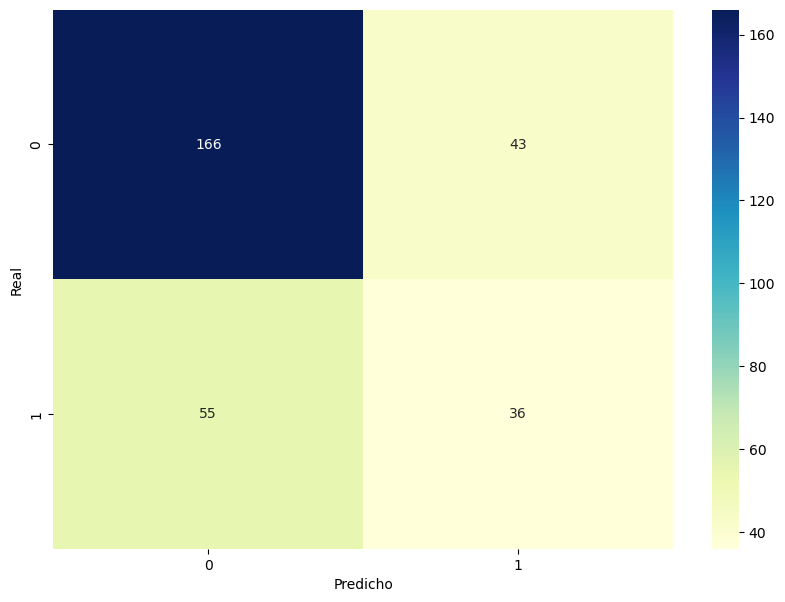

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar el Árbol de Decisión
clf = DecisionTreeClassifier(max_depth=42, random_state=42)

# Entrenar el clasificador
clf.fit(X_train, Y_train)

# Realizar predicciones en el conjunto de prueba
Y_pred = clf.predict(X_test)

# Calcular métricas
exactitud = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='weighted') 
sensibilidad = recall_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')
matriz_confusion = confusion_matrix(Y_test, Y_pred)

print(f"Exactitud: {exactitud}")
print(f"Precisión: {precision}")
print(f"Sensibilidad: {sensibilidad}")
print(f"Puntuación F1: {f1}")
print("Matriz de Confusión:")


# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(10,7))
sns.heatmap(matriz_confusion, annot=True, cmap="YlGnBu", fmt="g")
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()


Exactitud: 0.7
Precisión: 0.7118870435168301
Sensibilidad: 0.7
Puntuación F1: 0.7048448529785181
Matriz de Confusión:


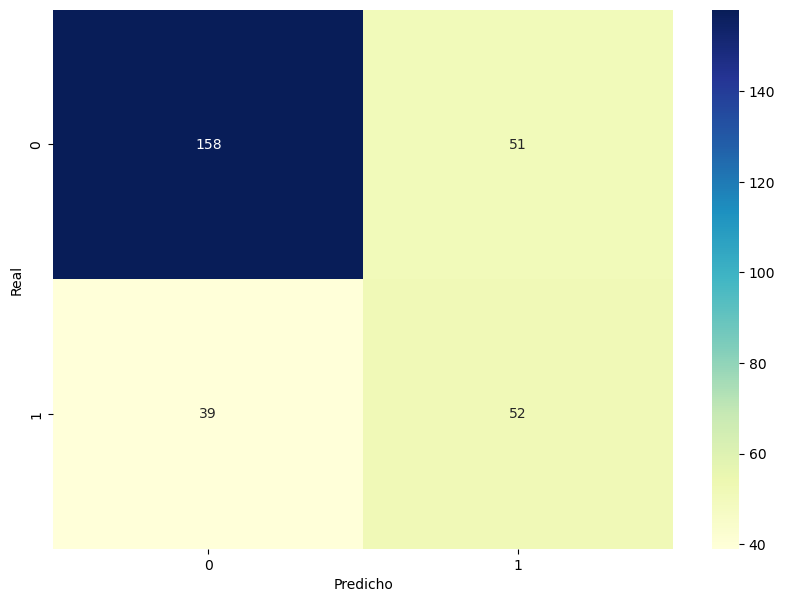

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar el Árbol de Decisión
clf = DecisionTreeClassifier(max_depth=42, random_state=42,class_weight={1: 0.7, 2: 0.3})

# Entrenar el clasificador
clf.fit(X_train, Y_train)

# Realizar predicciones en el conjunto de prueba
Y_pred = clf.predict(X_test)

# Calcular métricas
exactitud = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='weighted') 
sensibilidad = recall_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')
matriz_confusion = confusion_matrix(Y_test, Y_pred)

print(f"Exactitud: {exactitud}")
print(f"Precisión: {precision}")
print(f"Sensibilidad: {sensibilidad}")
print(f"Puntuación F1: {f1}")
print("Matriz de Confusión:")


# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(10,7))
sns.heatmap(matriz_confusion, annot=True, cmap="YlGnBu", fmt="g")
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()
